In [4]:
#load dataset 
import gzip
import sys
import pickle
import numpy as np
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(X_train,y_train ), (X_test, y_test) = data

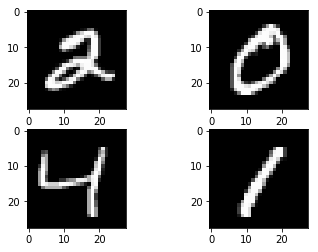

In [6]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
# CNN for the MNIST Dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


In [9]:
# define the CNN model
def build_NN():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = build_NN()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3657 - acc: 0.8875 - val_loss: 0.0755 - val_acc: 0.9768
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0908 - acc: 0.9724 - val_loss: 0.0426 - val_acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0666 - acc: 0.9791 - val_loss: 0.0344 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0464 - acc: 0.9855 - val_loss: 0.0339 - val_acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0421 - acc: 0.9864 - val_loss: 0.0271 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0381 - acc: 0.9875 - val_loss: 0.0260 - val_a

In [27]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy of CNN model < %.2f%%" % (scores[1]*100))
model.save('degit2_model.h5')

CNN Error: 0.74%
Accuracy of CNN model < 99.26%


In [28]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1,1, 28, 28)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('digit2_model.h5')
    # predict the class
    digit = model.predict_classes(img)
    print("Image digit is ",digit[0])

# entry point, run the example
run_example()

Image digit is  7
